In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/clone_counts/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta.tsv"
# sample_names = "Control,Flt3l,Input"
# min_cell = 10

se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta.tsv"
outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/clone_counts/" 
sample_names = "Input,Flt3l"
min_cell = 10


# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/donor3/cells_meta.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/enriched_barcodes/objs_high_pct/clones/variants_init/knn/kparam_30/annotation_clones/clone_counts/donor3"
# sample_names = "Input,Flt3l"
# min_cell = 10

In [2]:
sample_names = sample_names.split(",")
sample_names

['Input', 'Flt3l']

In [3]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
from os.path import join
%matplotlib inline

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,ATAC_snn_res.0.8,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name
Flt3l_AAACGAAAGGAGACTC-1,Flt3l,531,531,2286,298,7,7,124,749,1101,...,1,1,649,621,NaN,Flt3l_AAACGAAAGGAGACTC-1,None,None,None,None
Flt3l_AAACGAAAGTCACGCC-1,Flt3l,1222,1222,4711,555,16,12,289,853,2986,...,3,3,1674,1502,NaN,Flt3l_AAACGAAAGTCACGCC-1,None,None,None,None
Flt3l_AAACGAACAAGACTAA-1,Flt3l,2225,2225,9178,1509,37,19,585,1339,5689,...,1,1,3369,2695,NaN,Flt3l_AAACGAACAAGACTAA-1,None,None,None,None
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,...,5,5,3360,2784,NaN,Flt3l_AAACGAACAAGCGAAC-1,None,None,None,None
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,9,3722,2998,NaN,Flt3l_AAACGAACACAGCCAC-1,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2


In [6]:
group_counts = se_cells_meta.groupby(["condition", "donor"]).size()
group_counts

condition  donor
Flt3l      0         245
           1         110
Input      0        3413
           1        2512
None       None     7313
dtype: int64

### Remove None before normalizing

In [7]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Some dummy data
# x = [1, 2, 3, 4, 5, 6, 7]
# y = [1, 3, 3, 2, 5, 7, 9]

# # Find the slope and intercept of the best fit line
# slope, intercept = np.polyfit(x, y, 1)

# # Create a list of values in the best fit line, 
# abline_values = [1 * i + intercept for i in x]

# # Plot the best fit line over the actual values
# plt.plot(x, y, '--')
# plt.plot(x, abline_values, 'b')
# plt.title(slope)
# plt.show()

In [18]:
def plots(df, name, scatter_hue_col=None):
    f, ax =plt.subplots(figsize=(12,12))
    if df.shape[0] > 0:
        df[["ncells"]].plot.bar(ax=ax)
    else:
        # plot empty figures
        f = plt.figure()
        plt.savefig(join(outdir, name+".barplot_conditions.pdf"))
        plt.savefig(join(outdir, name+".barplot_conditions.png"))
        plt.savefig(join(outdir, name+".barplot.pdf"))
        plt.savefig(join(outdir, name+".conditionScatter.pdf"))
        plt.savefig(join(outdir, name+".conditionScatter.png"))
        return
    
    plt.savefig(join(outdir, name+".barplot.png"))
    plt.savefig(join(outdir, name+".barplot.pdf"))
    
    f, ax =plt.subplots(figsize=(12,12))
    df.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax)
    plt.savefig(join(outdir, name+".barplot_conditions.png"))
    plt.savefig(join(outdir, name+".barplot_conditions.pdf"))
    
    
    cultured_inds = set(df.columns.values) - {"Input", "ncells","donor"}
    df["cultured"] = df[cultured_inds].sum(axis=1)
    
    # Save this figure even if empty
    f, ax = plt.subplots(figsize=(12,12))
    if "Input" in df.columns and len(sample_names)>1:
        sns.scatterplot(data=df, x="Input", y="cultured", hue=scatter_hue_col, s=24, ax=ax)
        ax.plot([0, 1], [0, 1], transform=ax.transAxes)
        ax.set_box_aspect(1)
        
        r = stats.pearsonr(df["Input"], df["cultured"])
        
        ax.annotate(f"Pearson r={r[0]} p-val={r[1]}",xy=(0,1), xycoords='axes fraction',
                    xytext=(5,-5), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"), va="top")
        
        plt.savefig(join(outdir, name+".conditionScatter.png"))
        plt.savefig(join(outdir, name+".conditionScatter.pdf"))
        
        f, ax = plt.subplots()
        sns.regplot(data=df, x="Input", y="cultured", ax=ax)

    # Only save this figure if data there
    if len(sample_names) > 1:
        if sample_names[0] in df.columns and sample_names[1] in df.columns:
            f, ax =plt.subplots(figsize=(12,12))
            sns.scatterplot(data=df, x=sample_names[0], y=sample_names[1], hue=scatter_hue_col, s=24, ax=ax)
            ax.set_box_aspect(1)
            plt.savefig(join(outdir, name+".conditionScatter_comp02.png"))
            plt.savefig(join(outdir, name+".conditionScatter_comp02.pdf"))    

    return

In [14]:
clone_counts = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]
# if clone_counts_filt_10_df.shape[0] == 0:
#     clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=2]

In [10]:
clone_counts_filt_10_df

,donor,ncells,Flt3l,Input
name,,,,
0_0,0,429,41.0,388.0
1_0,1,317,16.0,301.0
0_1,0,268,13.0,255.0
0_2,0,230,17.0,213.0
1_1,1,196,4.0,192.0
...,...,...,...,...
0_34,0,23,1.0,22.0
1_23,1,22,0.0,22.0
0_35,0,21,0.0,21.0


## Split by donors

0
sum of normed values condition  donor
Flt3l      0        1.0
Input      0        1.0
Name: ncells, dtype: float64
1


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


sum of normed values condition  donor
Flt3l      1        1.0
Input      1        1.0
Name: ncells, dtype: float64


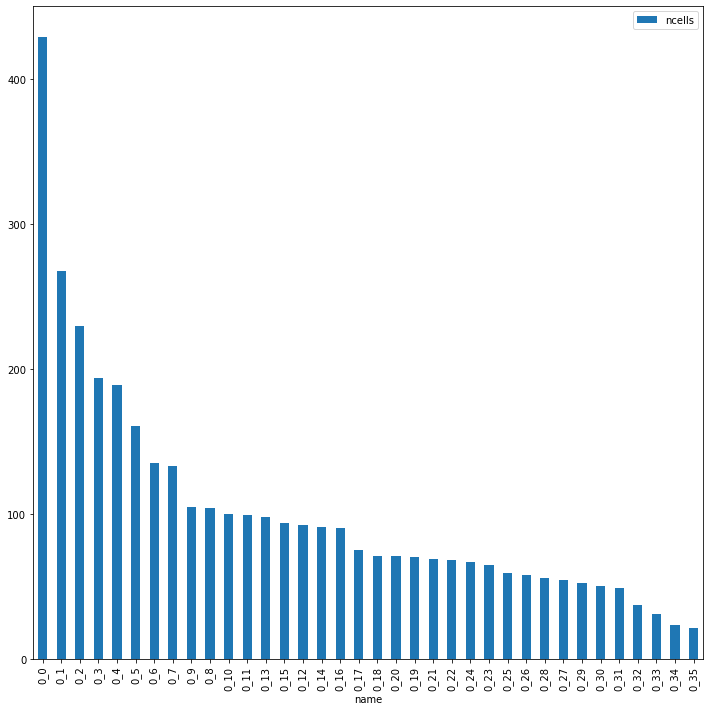

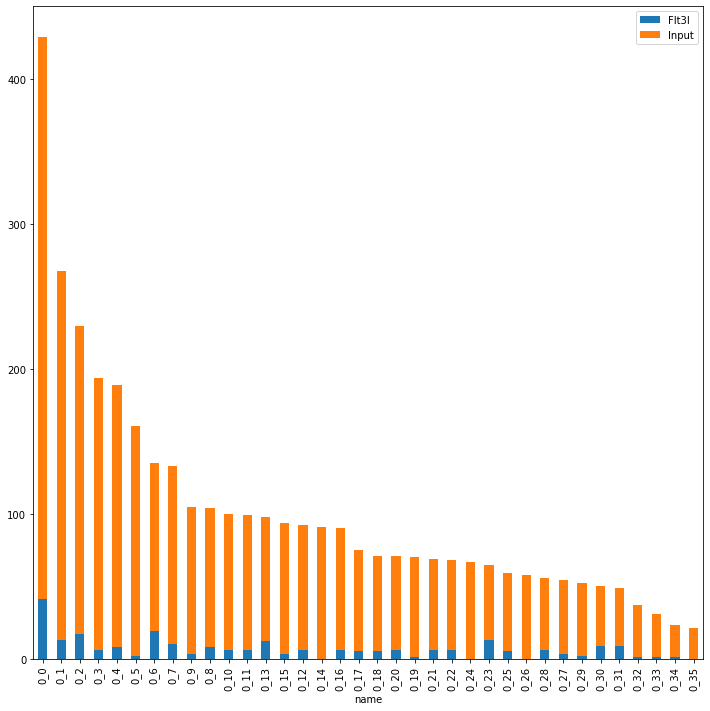

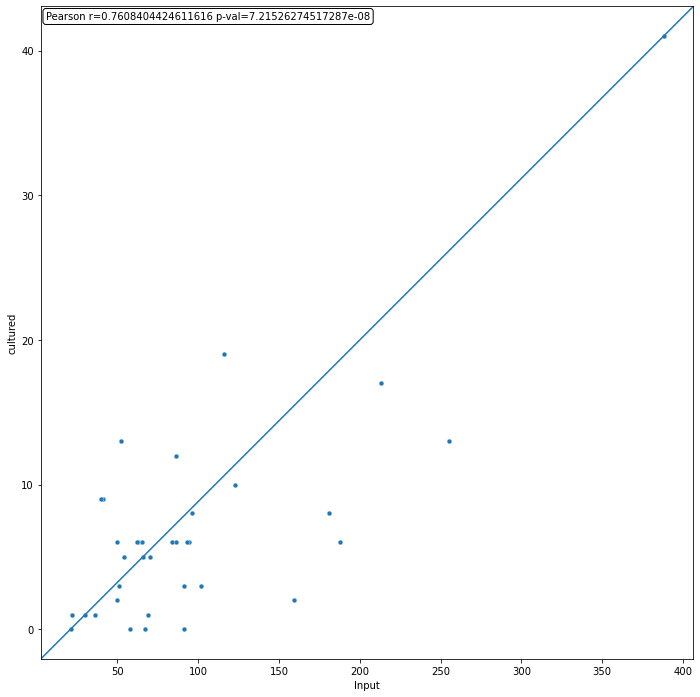

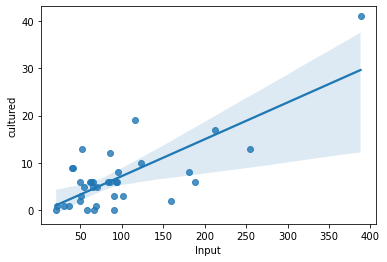

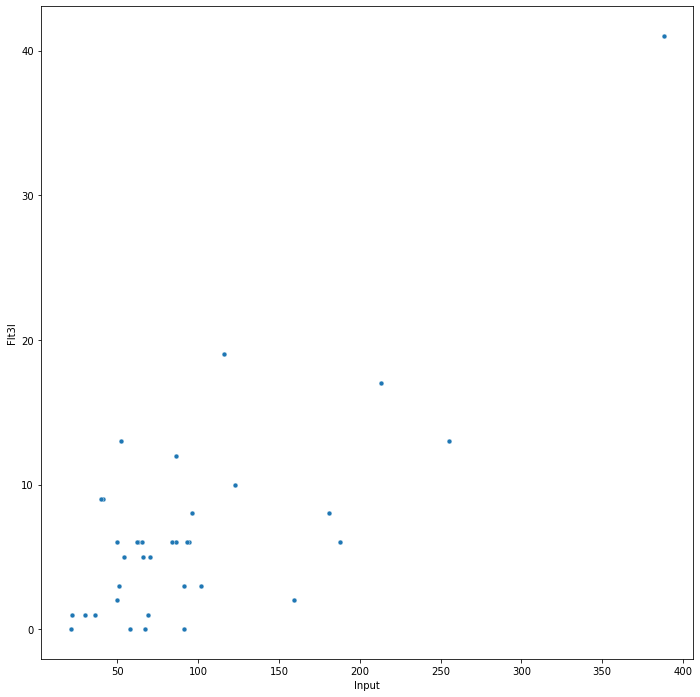

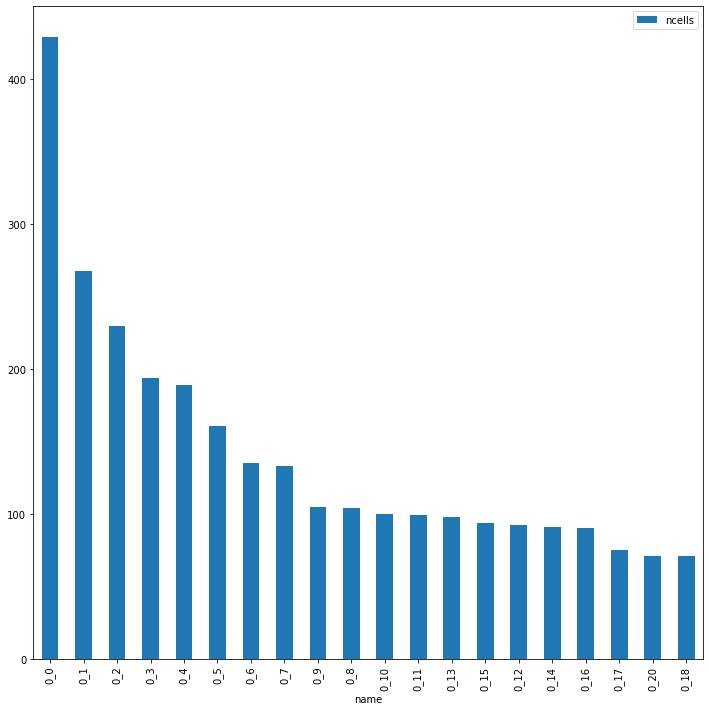

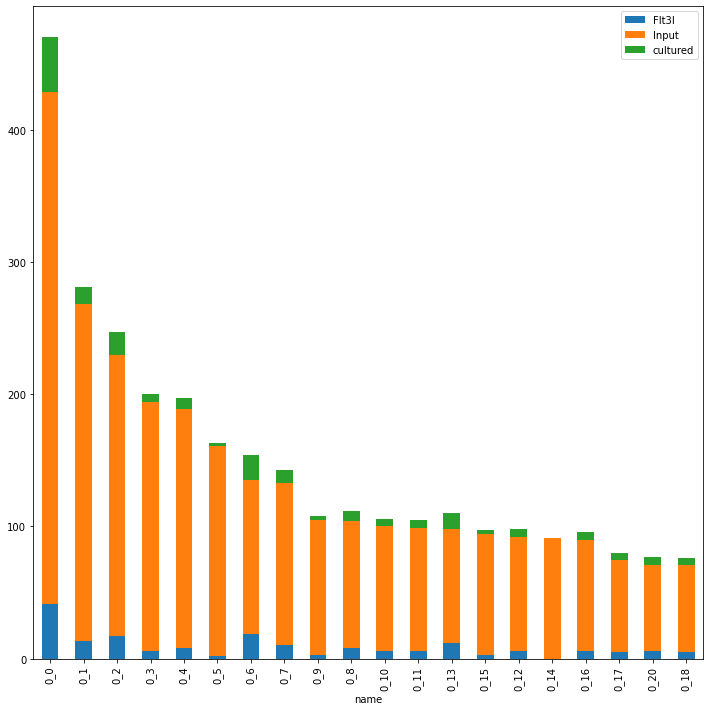

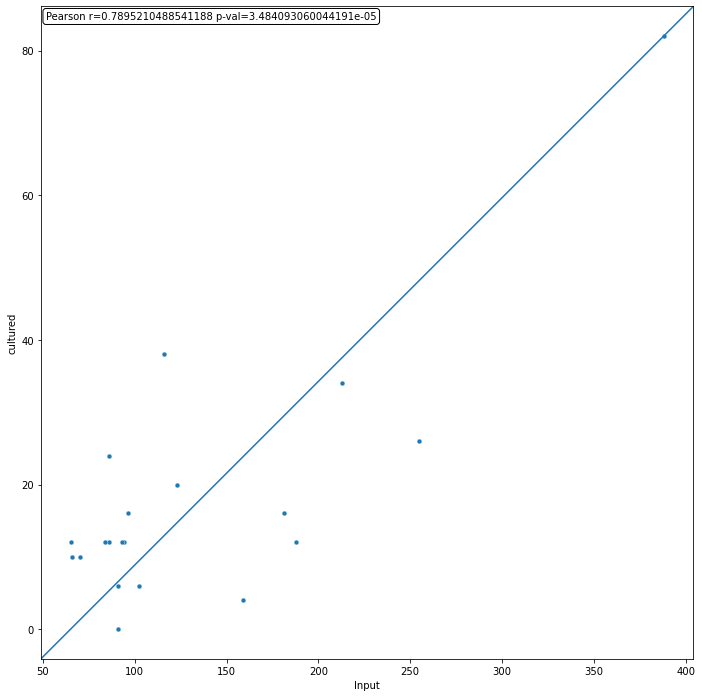

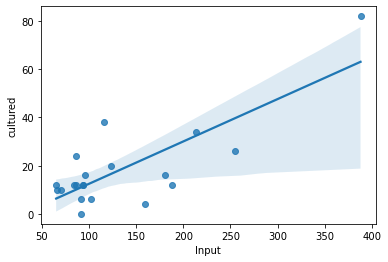

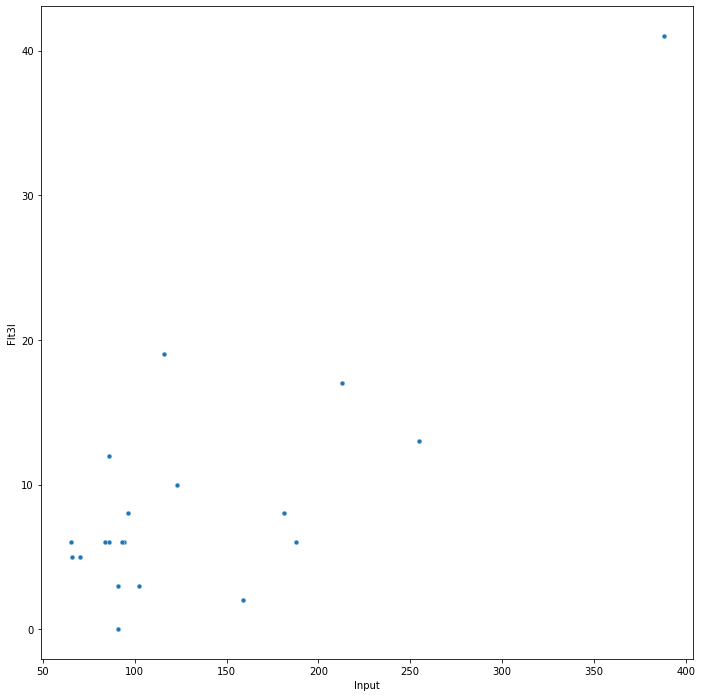

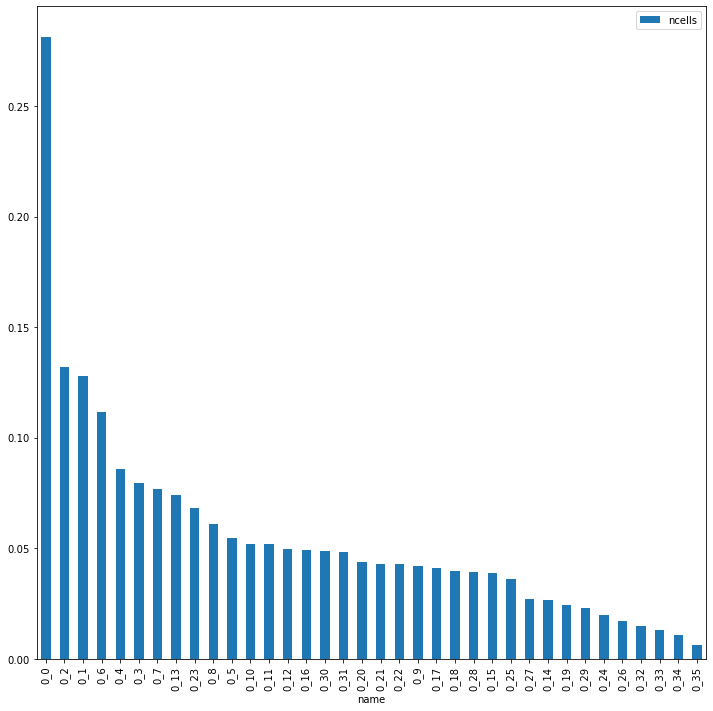

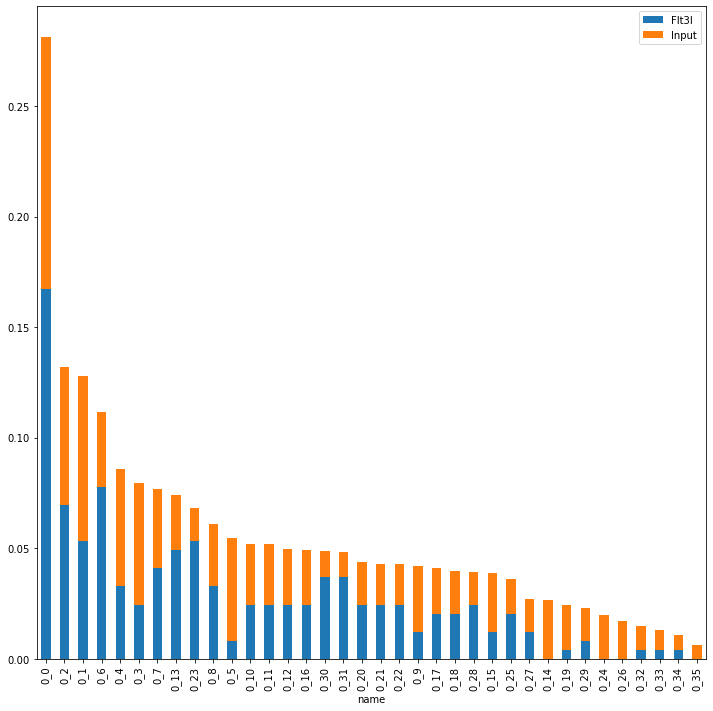

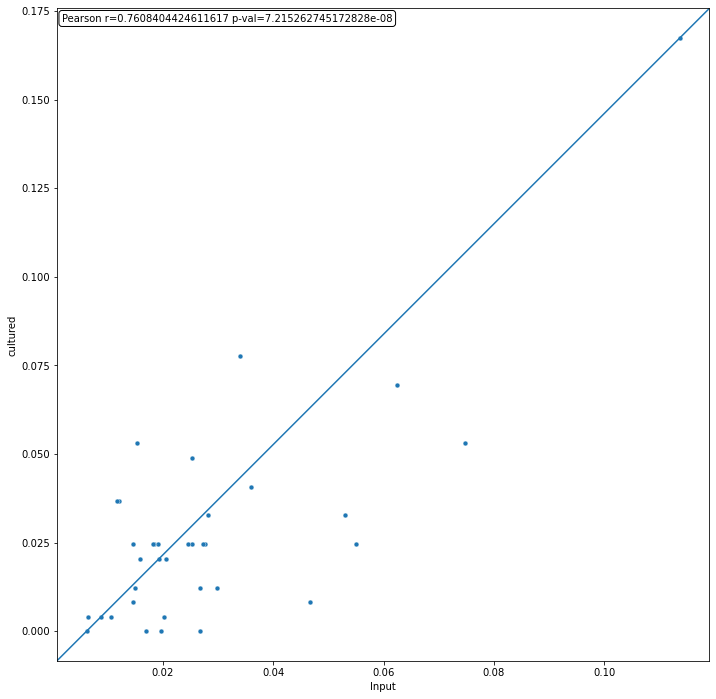

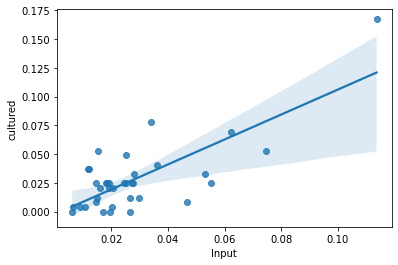

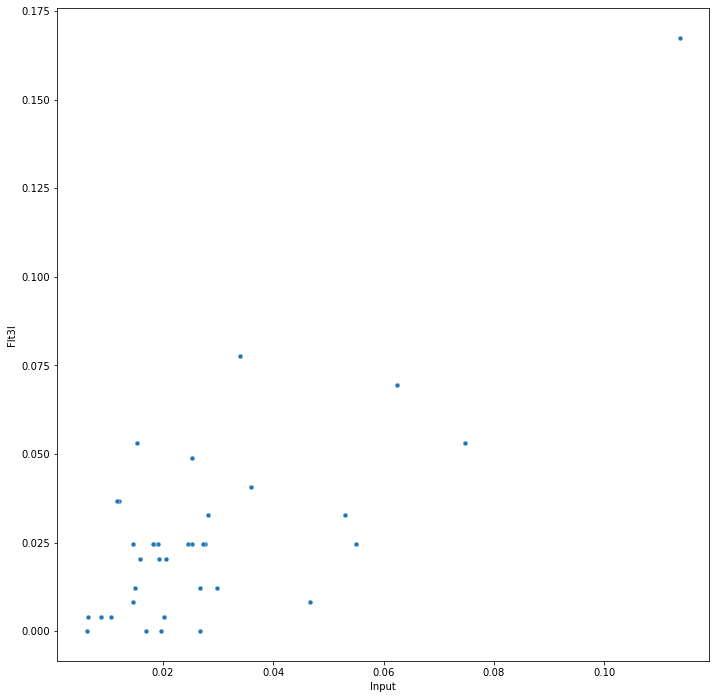

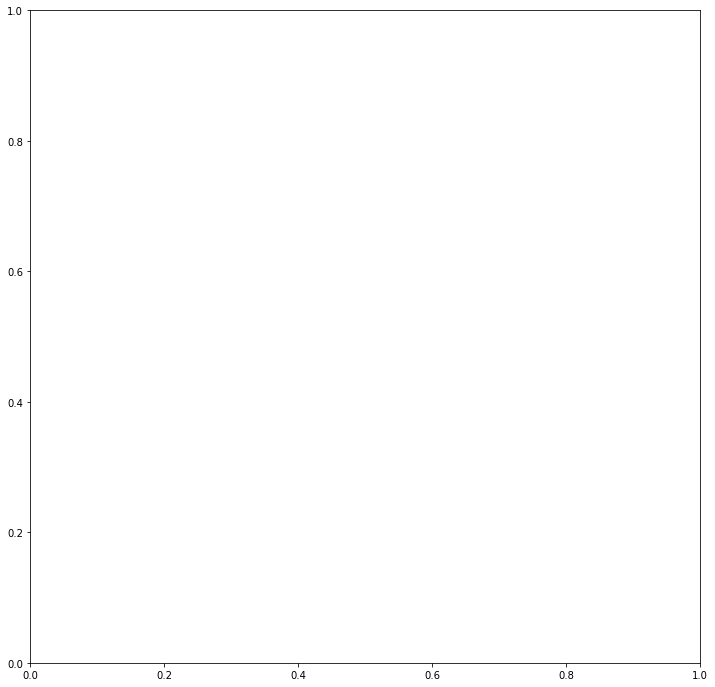

<Figure size 432x288 with 0 Axes>

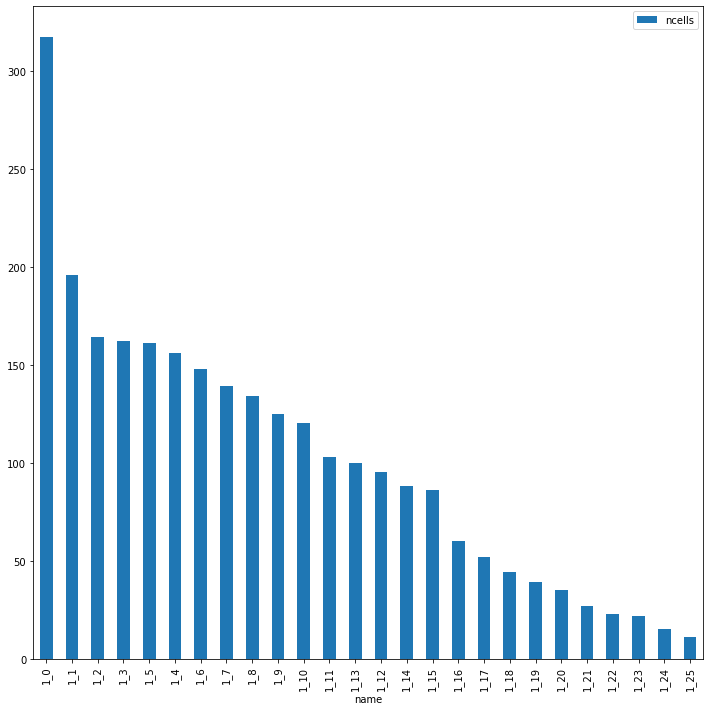

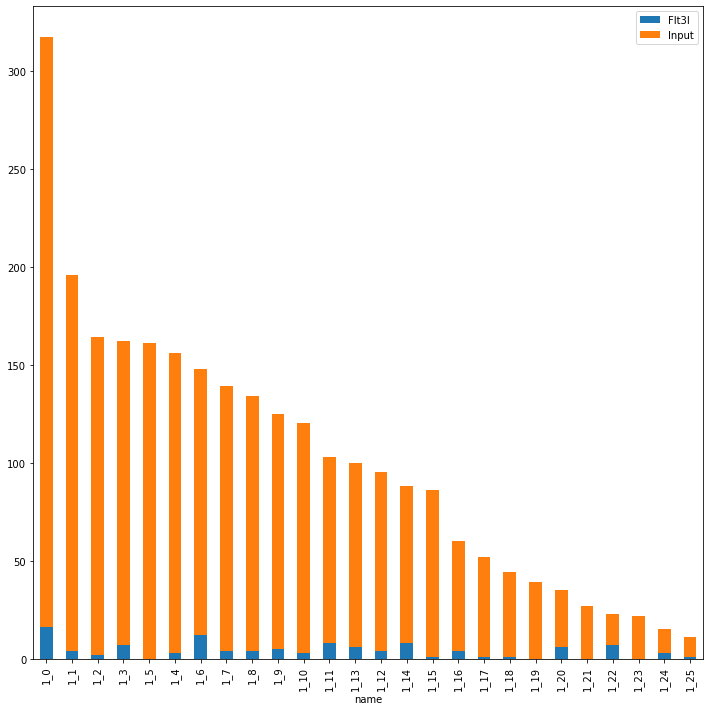

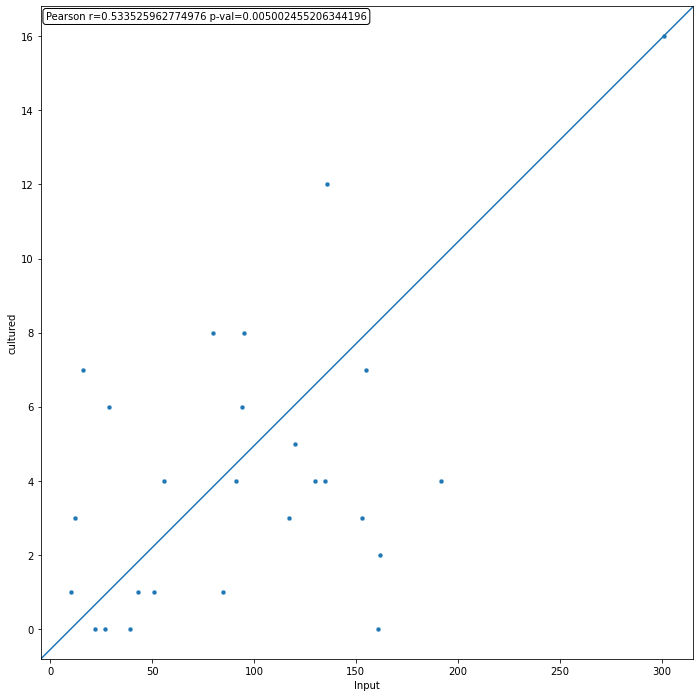

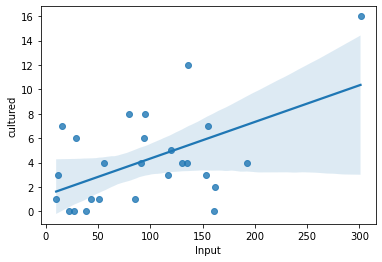

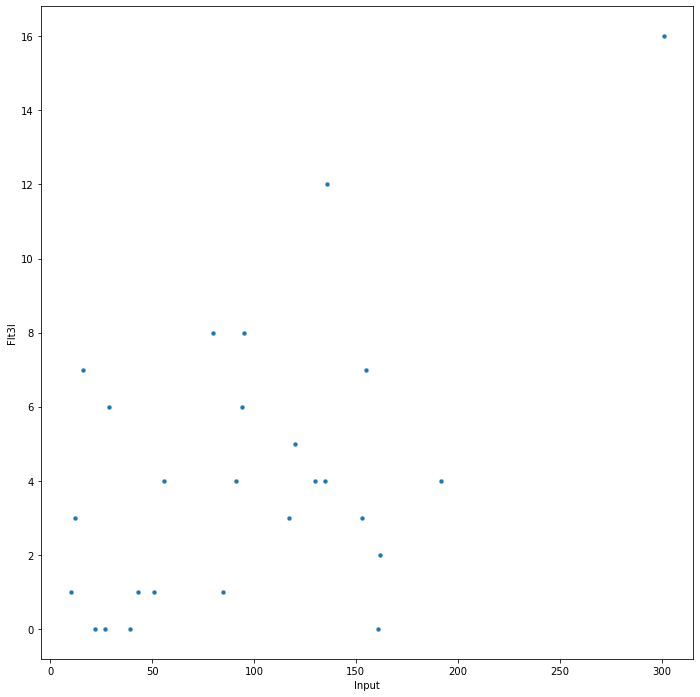

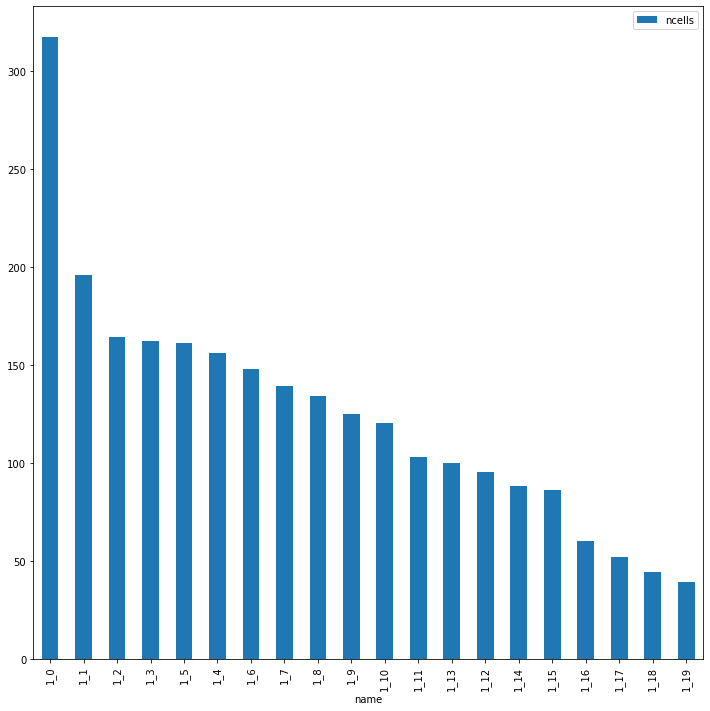

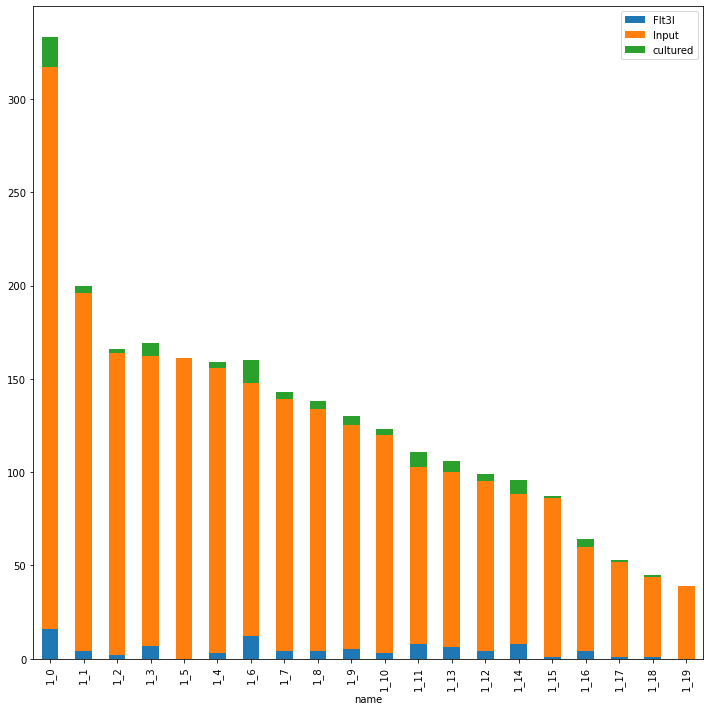

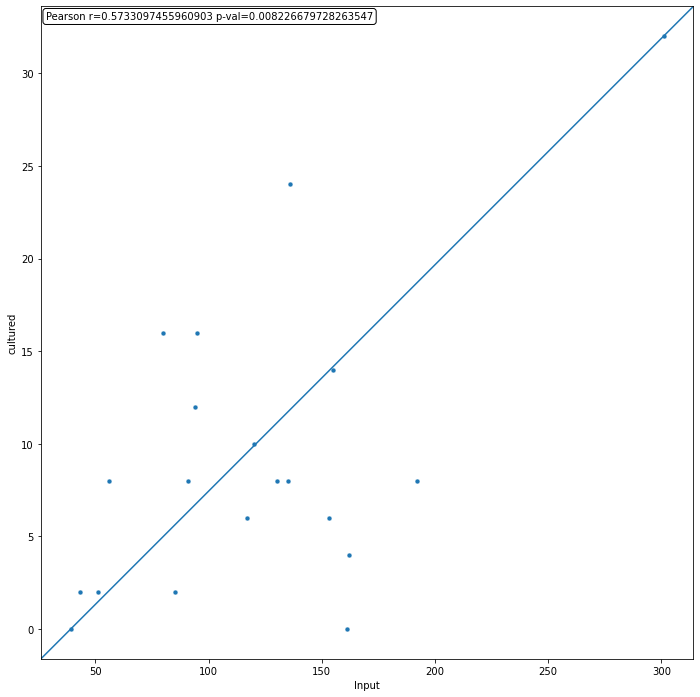

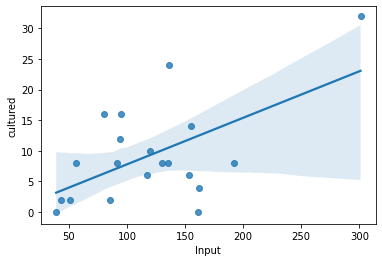

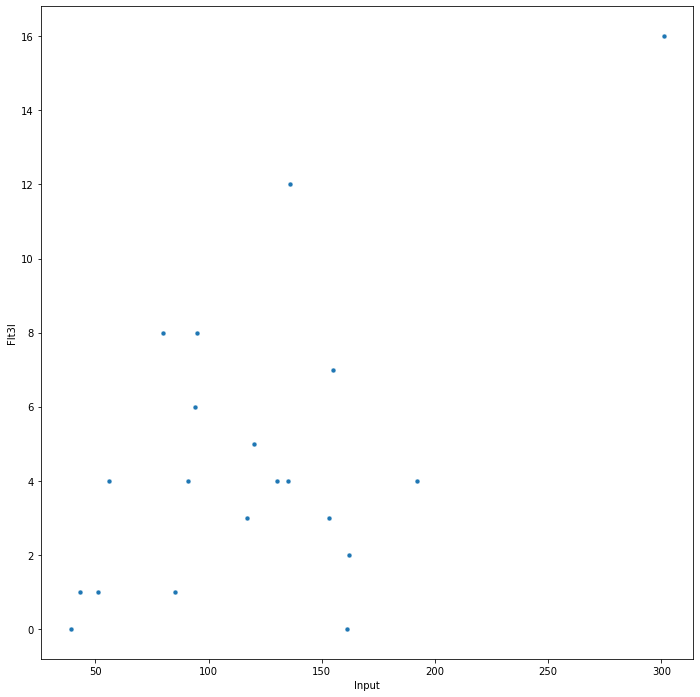

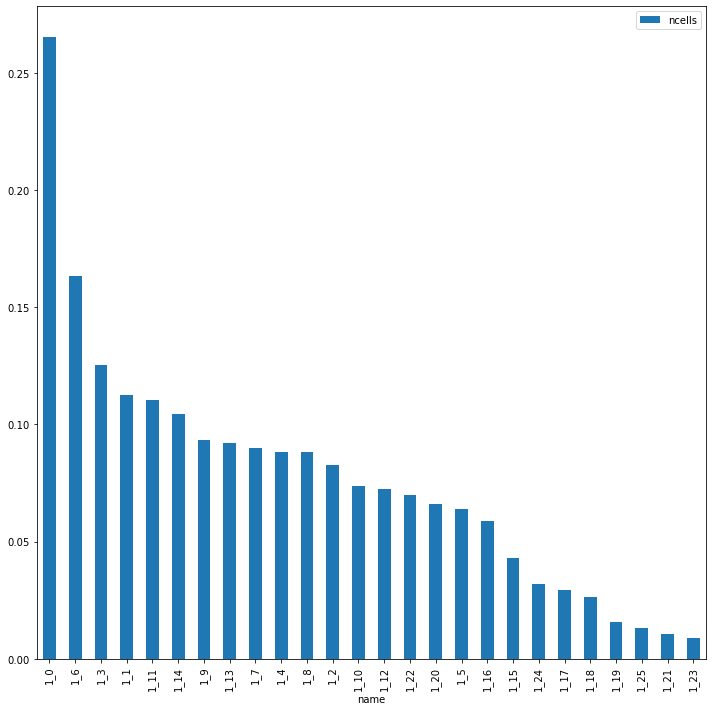

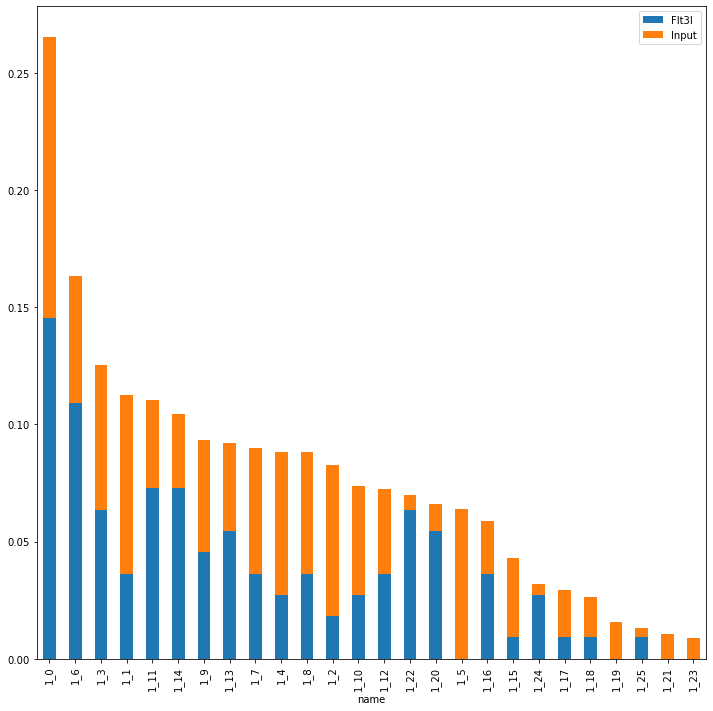

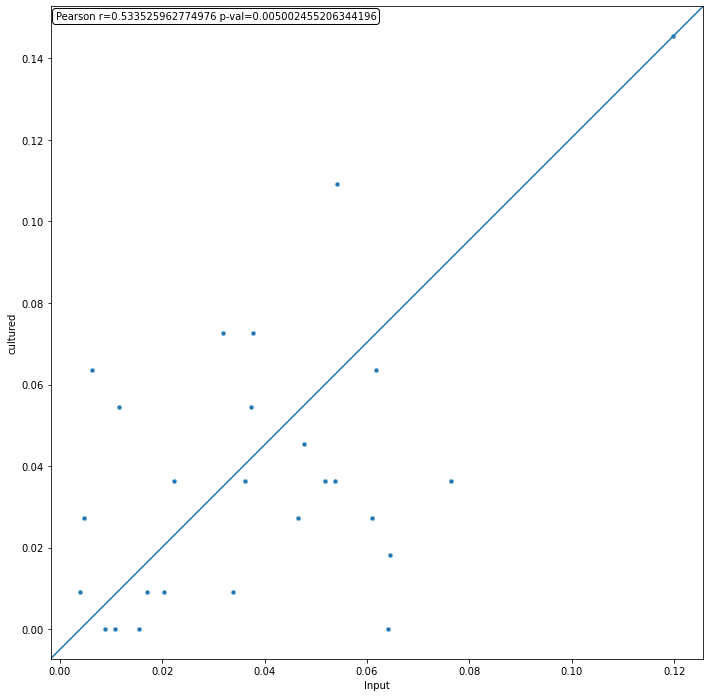

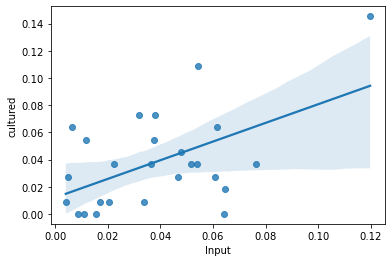

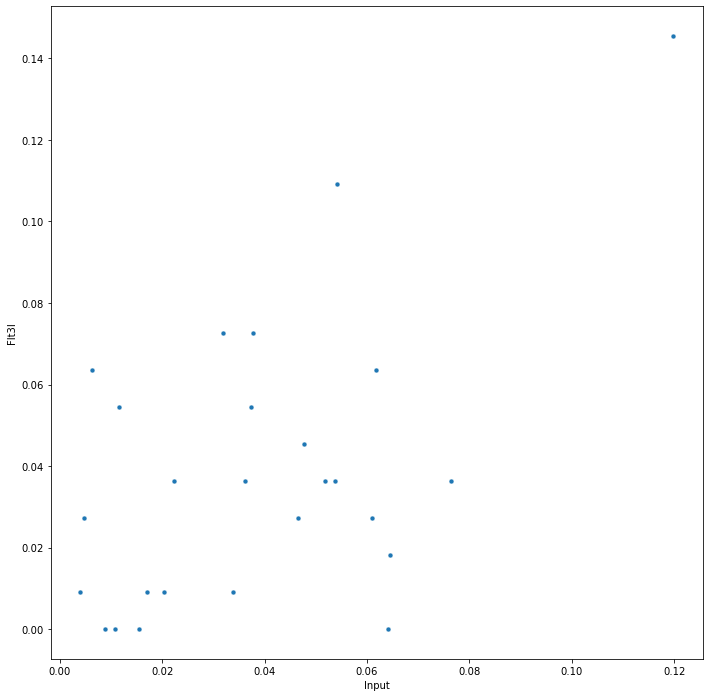

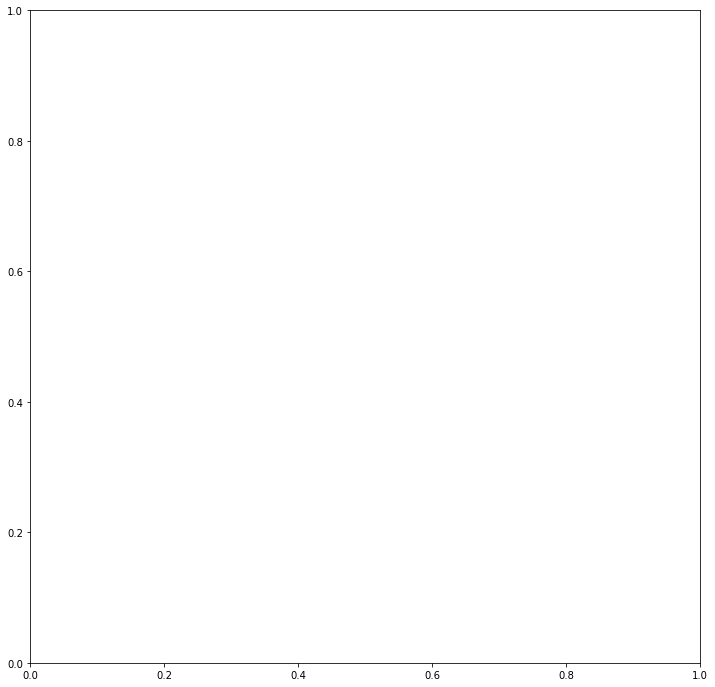

<Figure size 432x288 with 0 Axes>

In [19]:
for d, curr_df in clone_counts_filt_10_df.groupby("donor"):
    print(d)
    if "cultured" in curr_df.columns:
        curr_df = curr_df.drop("cultured", axis=1)
    plots(curr_df, name=f"donor{d}.clone_counts")
    plots(keep_top_clones(curr_df, n_top=20, min_cell=min_cell),
      name=f"donor{d}.top20_minCell{min_cell}_clone_counts")

    clone_norm = clone_counts[clone_counts["donor"]==d].copy()
    clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

    print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

    #clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
    clone_norm = clone_norm[~(clone_norm["name"]=="None")]
    clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
    def get_clone_count(x):
        curr = clone_norm[clone_norm["name"]==x.name]
        return curr.set_index("condition")["ncells"]

    clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
    clone_norm_df

    plots(clone_norm_df, name=f"donor{d}.normalized_clone_counts")
    plots(keep_top_clones(clone_norm_df, n_top=20, min_cell=min_cell),
          name=f"donor{d}.normalized_top20_minCell{min_cell}_clone_counts")


## Plot across all donors

TypeError: tuple indices must be integers or slices, not tuple

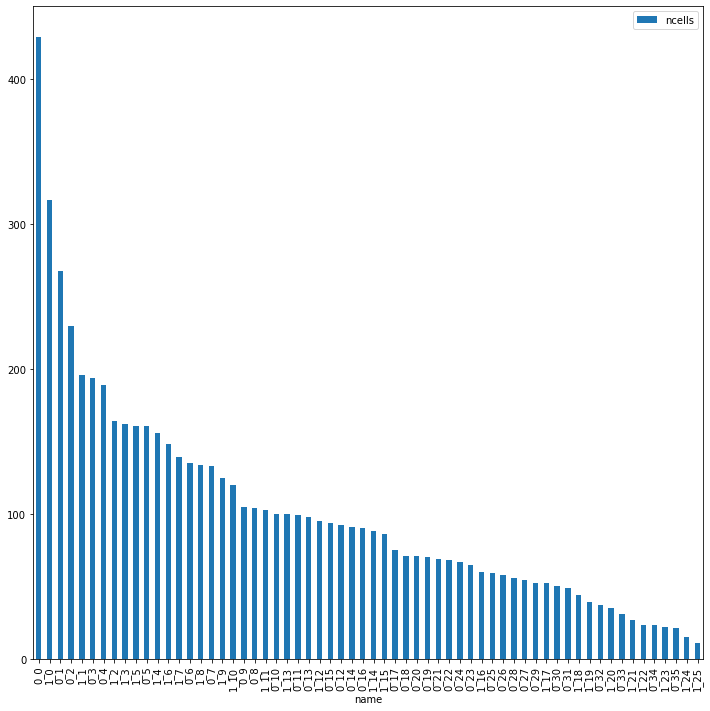

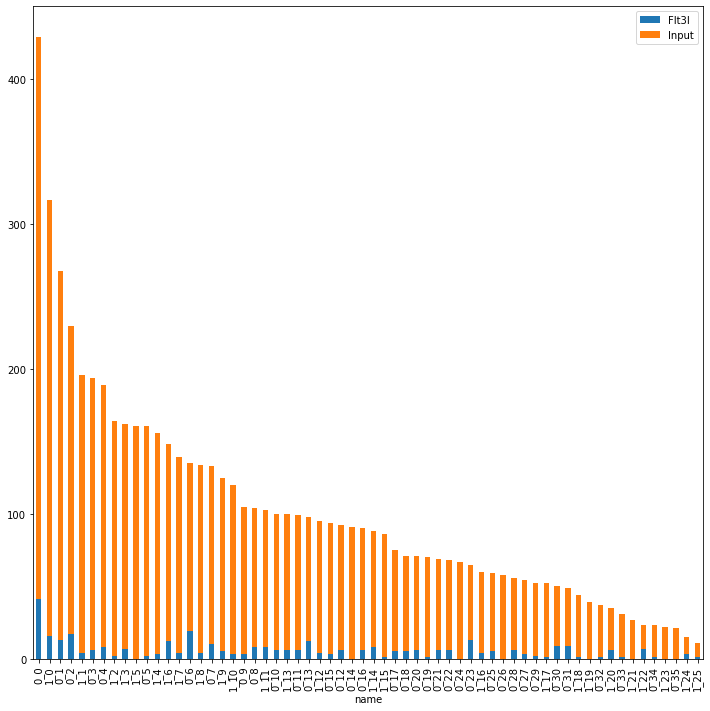

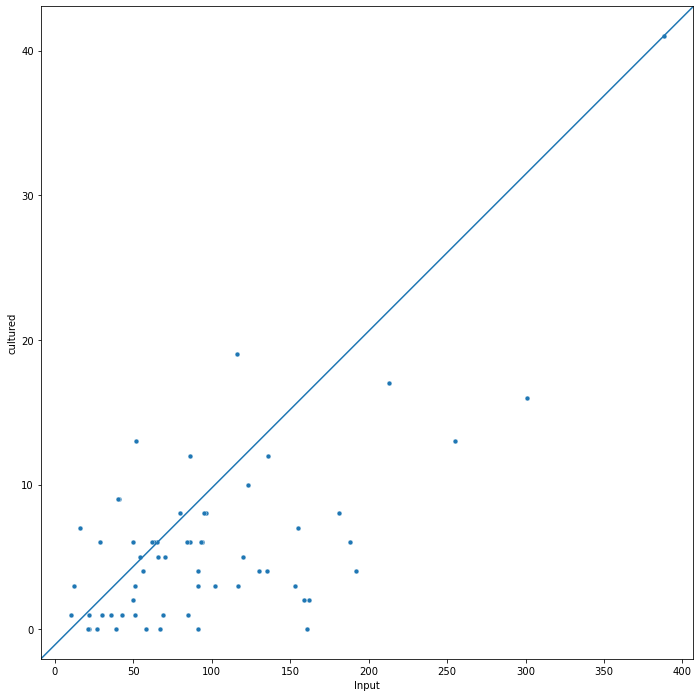

In [12]:
%matplotlib inline
plots(clone_counts_filt_10_df,
      name="clone_counts")

# Normalize

In [12]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/group_counts.loc[(x["condition"], x["donor"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["condition", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "condition","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("condition")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df




sum of normed values condition  donor
Flt3l      0        1.0
Input      0        1.0
Name: ncells, dtype: float64


,donor,ncells,Flt3l,Input
name,,,,
0_9,0,0.303619,0.174641,0.128978
0_10,0,0.250751,0.110048,0.140704
0_11,0,0.233280,0.124402,0.108878
0_13,0,0.173215,0.136364,0.036851
0_12,0,0.163890,0.105263,0.058626
...,...,...,...,...
0_72,0,0.003350,0.000000,0.003350
0_52,0,0.003350,0.000000,0.003350
0_55,0,0.003350,0.000000,0.003350


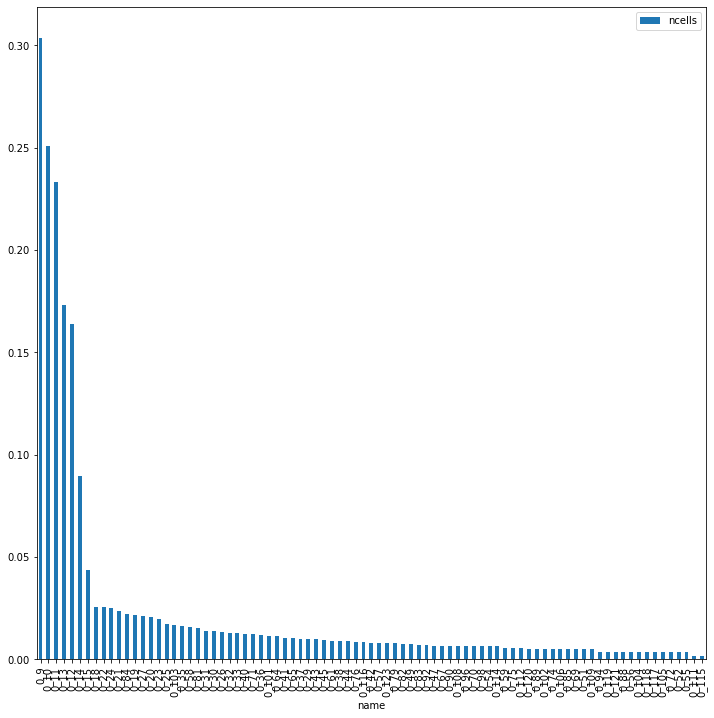

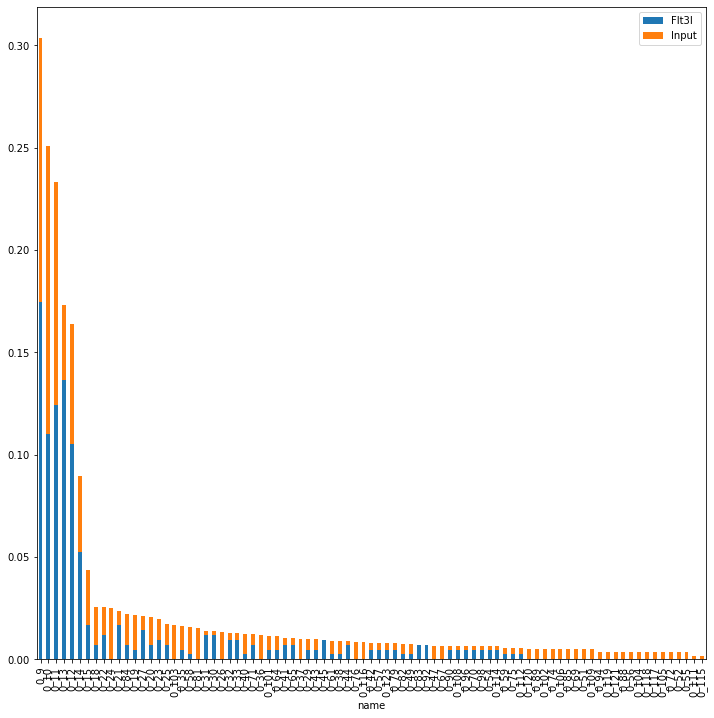

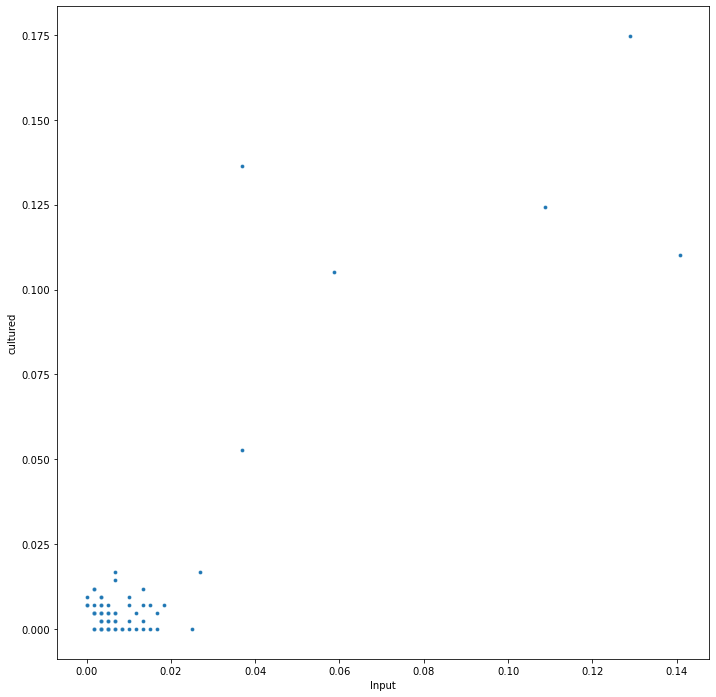

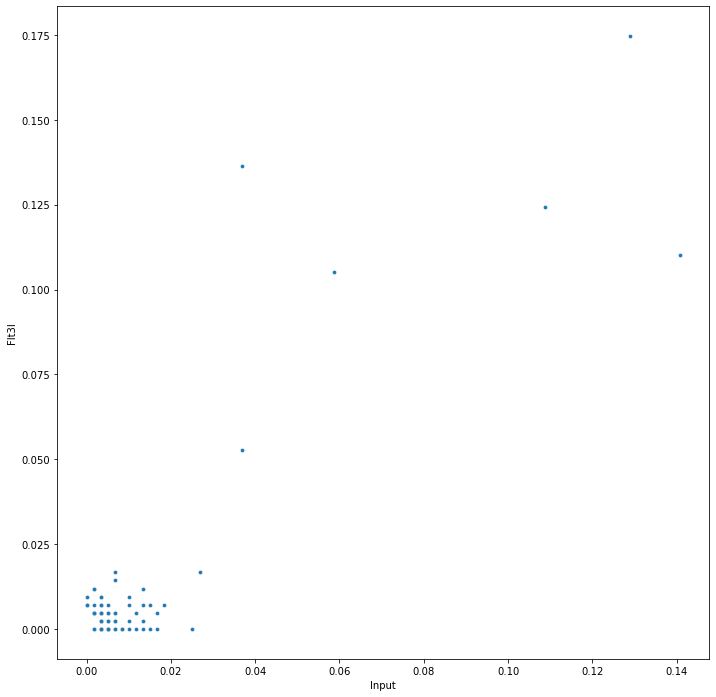

In [13]:
plots(clone_norm_df,
      name="normalized_counts")

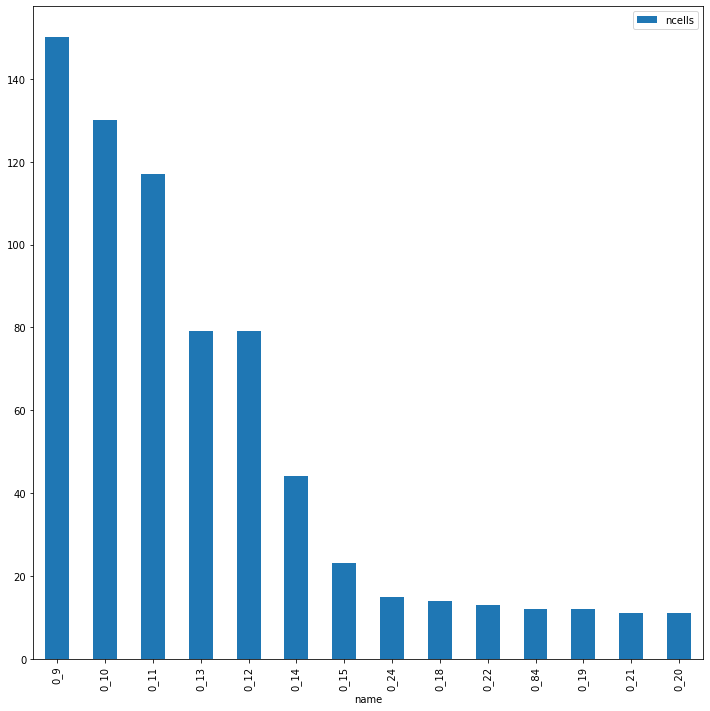

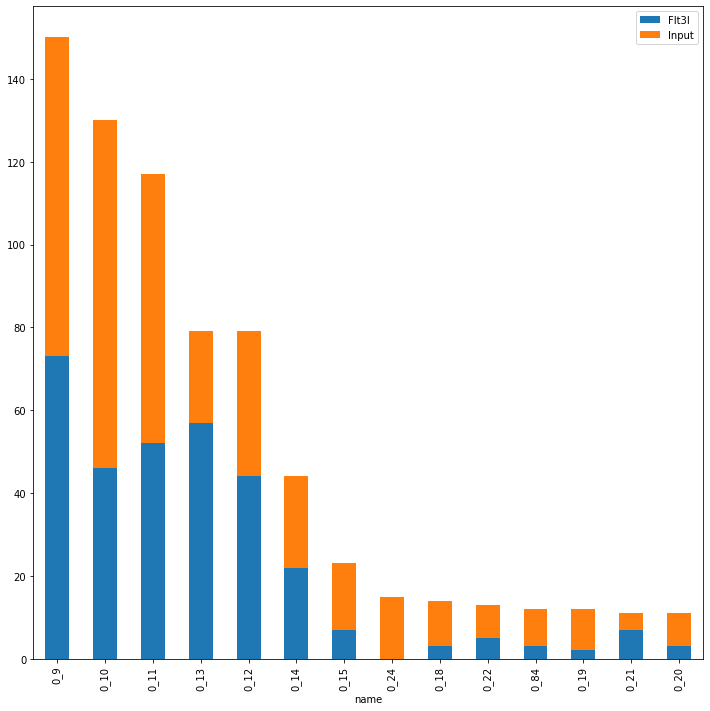

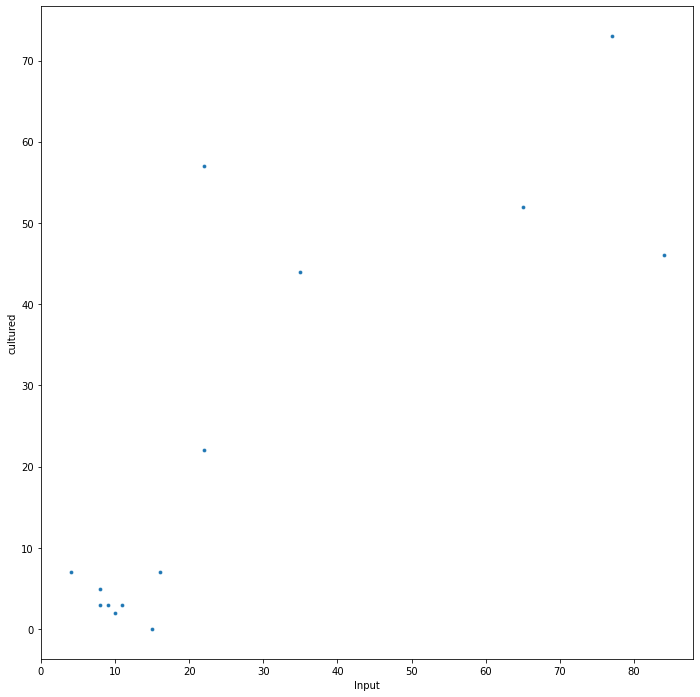

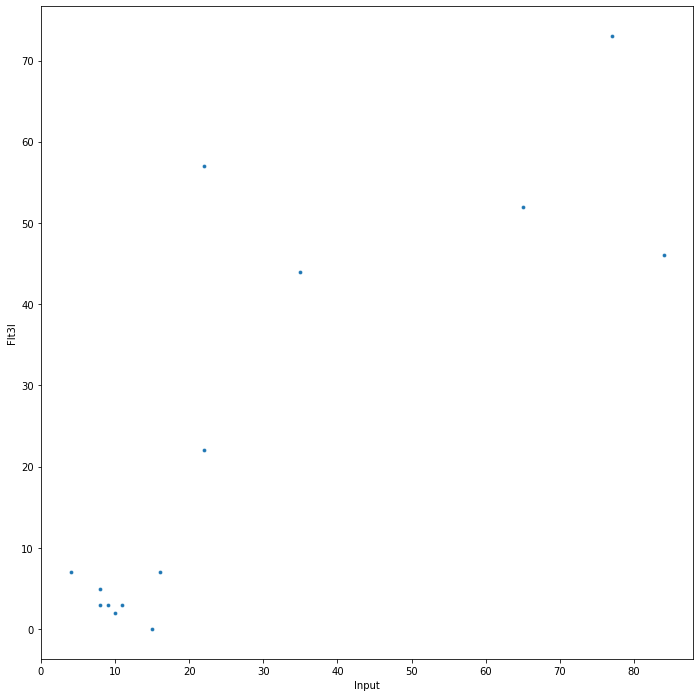

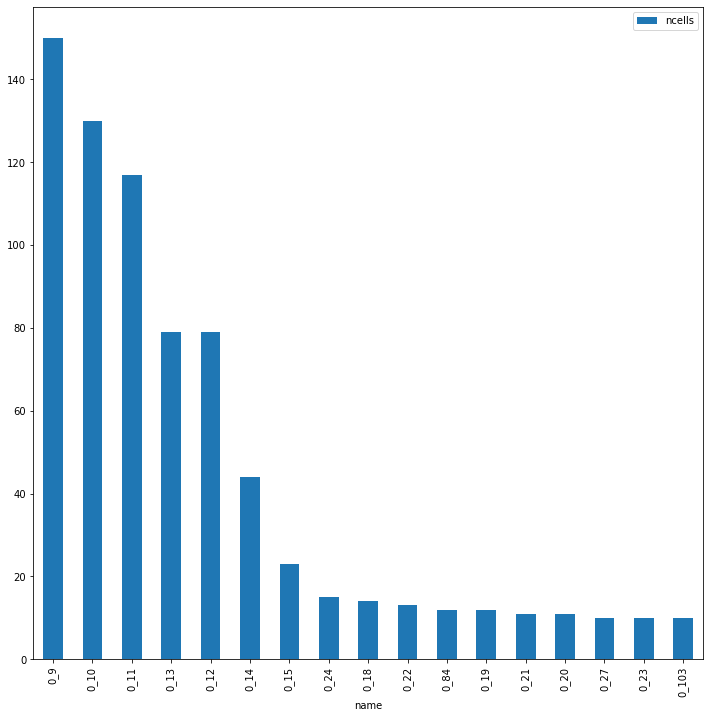

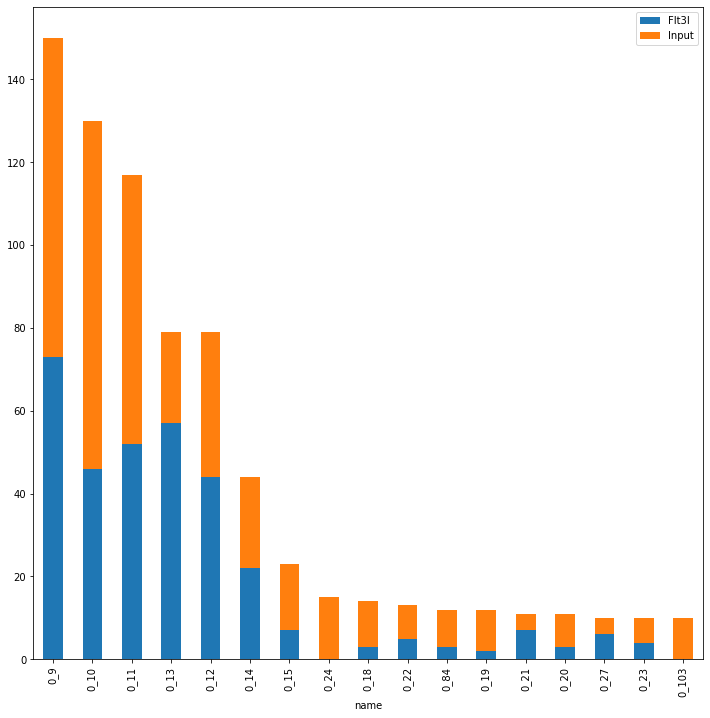

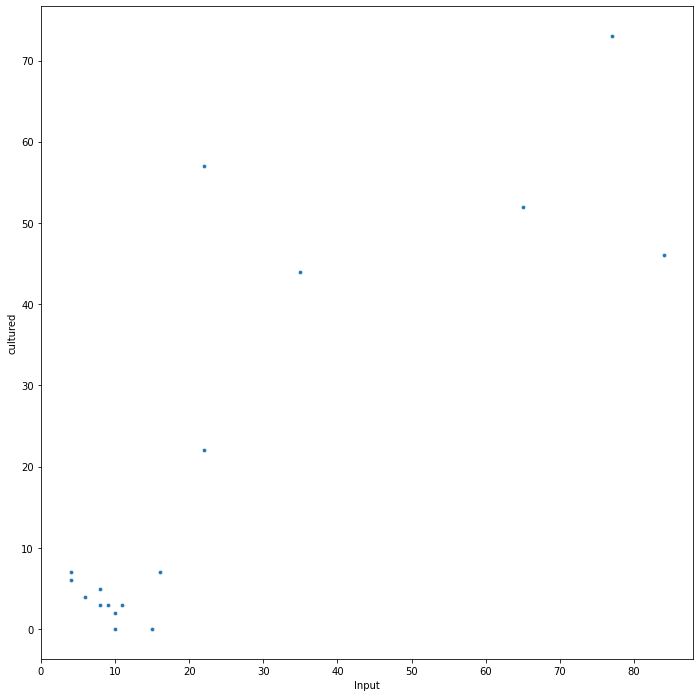

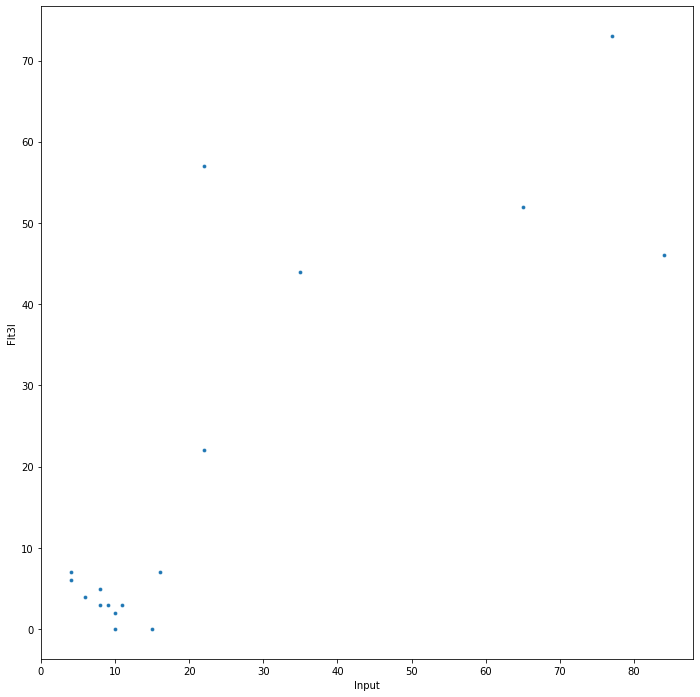

In [15]:
if "cultured" in clone_counts_filt_10_df.columns:
    clone_counts_filt_10_df = clone_counts_filt_10_df.drop("cultured",axis=1)
plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_counts")

plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=2),
      name=f"top20_minCell{min_cell}_clone_counts")

In [ ]:
## Only top clones
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

if "cultured" in clone_norm_df.columns:
    clone_norm_df = clone_norm_df.drop("cultured", axis=1)
plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")